# Ejercicio de la Teoria - Agrupamiento (Clusteing K-means)
El archivo SEMILLAS.csv contiene información de granos que
pertenecen a tres variedades de trigo: Kama, Rosa y Canadiense

Describa los tipos de semillas inspeccionados utilizando el algoritmo K-medias

In [3]:
# Importaciones para realizar el Clustering k-means sobre un dataframe
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('semillas.csv')
df

,Area,Perimetro,Compacidad,LongNucleo,AnchoNucleo,Asimetria,LongSurco,Clase
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,Tipo1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,Tipo1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,Tipo1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,Tipo1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,Tipo1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,Tipo3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,Tipo3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,Tipo3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,Tipo3


In [6]:
print(df.groupby('Clase').size())

Clase
Tipo1    70
Tipo2    70
Tipo3    70
dtype: int64


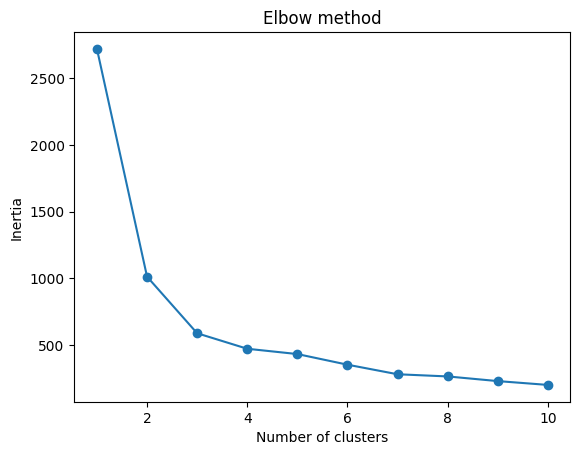

In [5]:
inertias = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df.iloc[:, :-1])
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

Confusion Matrix:
[[ 1 69  0]
 [68  2  0]
 [ 0 70  0]]
Accuracy Score:
0.014285714285714285


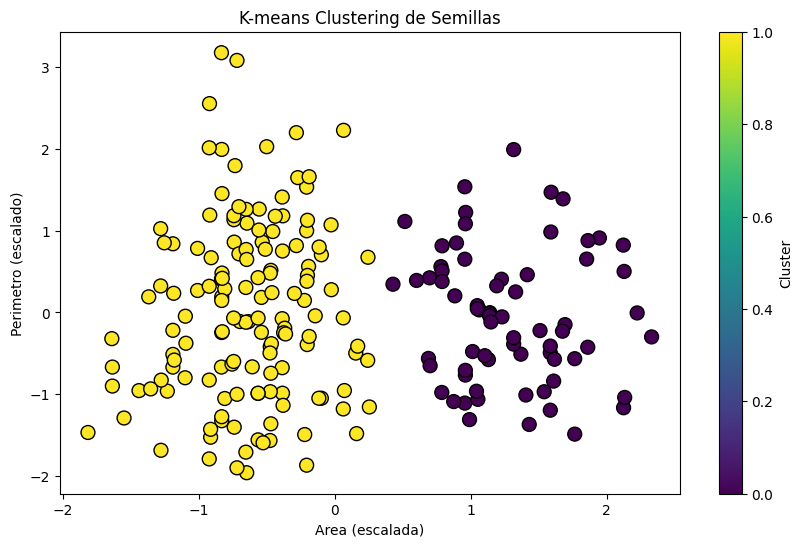

In [13]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Cargar el archivo CSV
df = pd.read_csv('semillas.csv')

# Separar las características y la etiqueta
X = df[['LongSurco', 'Asimetria']]
y = df['Clase']

# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar K-means con 3 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)

# Obtener las etiquetas predichas
y_pred = kmeans.labels_

# Convertir las etiquetas verdaderas a números si es necesario
y = pd.factorize(y)[0]

# Evaluar los resultados
print("Confusion Matrix:")
print(confusion_matrix(y, y_pred))

print("Accuracy Score:")
print(accuracy_score(y, y_pred))

# Plotear los resultados
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_pred, cmap='viridis', marker='o', edgecolor='k', s=100)
plt.title('K-means Clustering de Semillas')
plt.xlabel('Area (escalada)')
plt.ylabel('Perimetro (escalado)')
plt.colorbar(label='Cluster')
plt.show()

In [15]:
# Convertir los valores de la columna 'Clase' a valores numéricos
df['Clase'] = df['Clase'].map({'Tipo1': 1, 'Tipo2': 2, 'Tipo3': 3})

In [16]:
df['Clase'].unique()

array([1, 2, 3], dtype=int64)

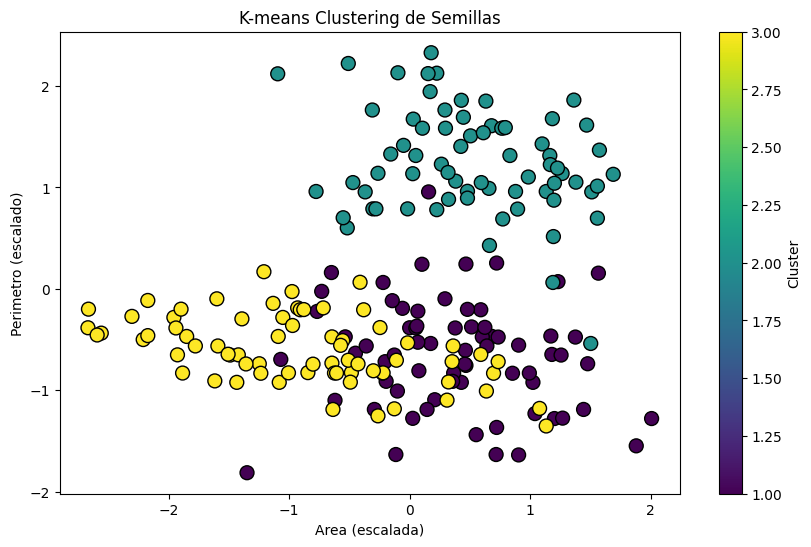

In [ ]:
X = df[['Compacidad', 'LongSurco']]
y = df['Clase']

# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=df['Clase'], cmap='viridis', marker='o', edgecolor='k', s=100)
plt.title('K-means Clustering de Semillas')
plt.xlabel('Area (escalada)')
plt.ylabel('Perimetro (escalado)')
plt.colorbar(label='Cluster')
plt.show()

# Silhouette

In [62]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def silhouette(data, max_clusters=10):
    """
    Función para seleccionar el número óptimo de clusters utilizando el coeficiente de Silhouette.

    Parámetros:
    -----------
    data : matriz o matriz dispersa, forma (n_samples, n_features)
        Los datos de entrada.

    max_clusters : int, opcional (por defecto=10)
        El número máximo de clusters a considerar.

    Retorna:
    -------
    best_k : int
        El número óptimo de clusters seleccionado por el método de Silhouette
    """

    silhouette_scores = []  # Lista para almacenar los coeficientes de Silhouette

    # Iterar sobre los valores de k
    for k in range(2, max_clusters + 1):
        # Crear un modelo de KMeans con el número de clusters k
        kmeans = KMeans(n_clusters=k, max_iter=500, n_init=10, random_state=85)

        # Ajustar el modelo a los datos y obtener las etiquetas de los clusters
        labels = kmeans.fit_predict(data)

        # Calcular el coeficiente de Silhouette para el modelo
        silhouette_avg = silhouette_score(data, labels)

        # Agregar el coeficiente a la lista
        silhouette_scores.append(silhouette_avg)

    # Encontrar el valor de k con el coeficiente de Silhouette más alto
    best_k = 2 + silhouette_scores.index(max(silhouette_scores))

    return best_k, silhouette_scores


3

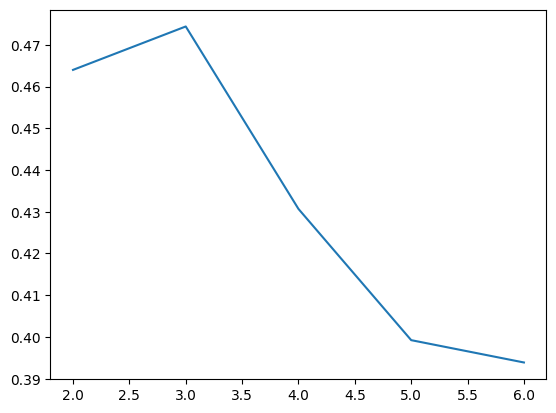

In [34]:
plt.plot(range(2,7),silhouette(X_scaled, max_clusters=6)[1])
silhouette(X_scaled, max_clusters=6)[0]

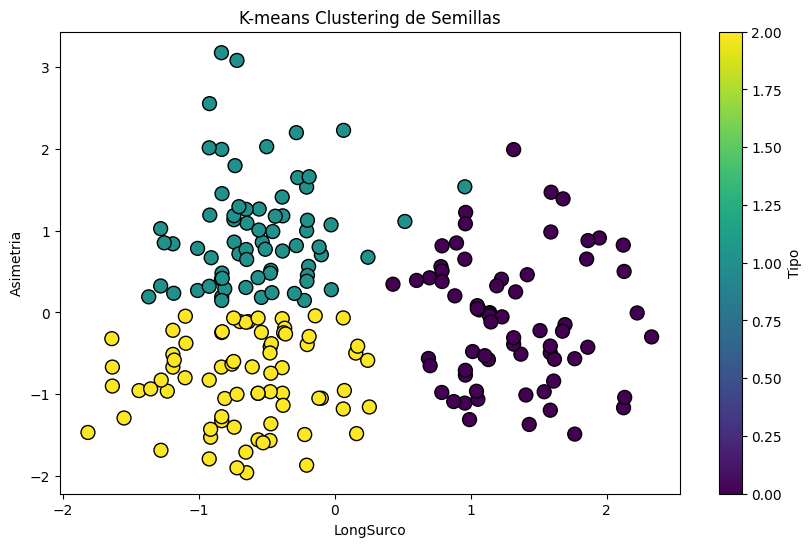

In [36]:
# Escalar las características necesarias para clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[['LongSurco', 'Asimetria']])

# Aplicar K-means con el número óptimo de clusters

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
# Obtener las etiquetas predichas
y_pred = kmeans.labels_
# Convertir las etiquetas verdaderas a números si es necesario
y = pd.factorize(df['Clase'])[0]
# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_pred, cmap='viridis', marker='o', edgecolor='k', s=100)
plt.title('K-means Clustering de Semillas')
plt.xlabel('LongSurco')
plt.ylabel('Asimetria')
plt.colorbar(label='Tipo')
plt.show()


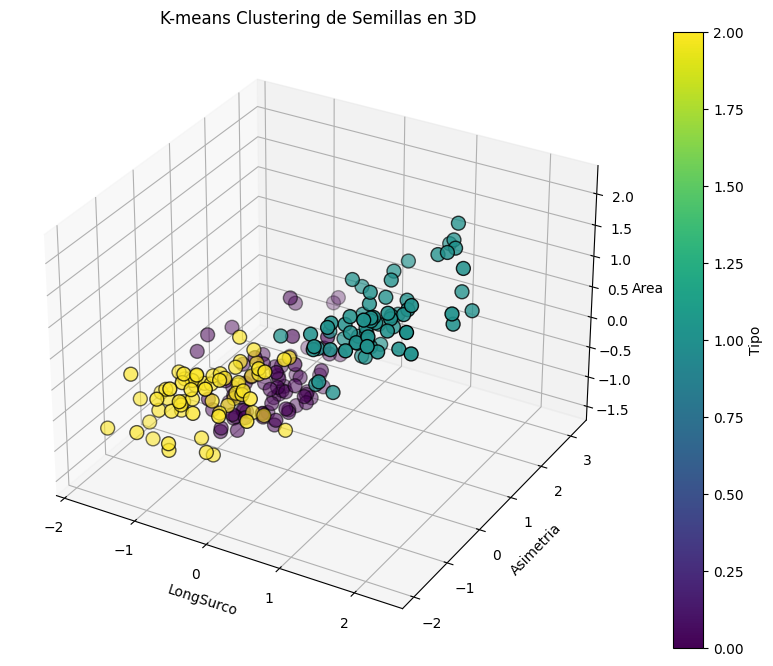

In [61]:
from mpl_toolkits.mplot3d import Axes3D

# Escalar las características necesarias para clustering, incluyendo 'Area'
X_scaled = scaler.fit_transform(df[['LongSurco', 'Asimetria', 'Area']])

# Aplicar K-means con el número óptimo de clusters
kmeans = KMeans(n_clusters=3, random_state=55)
kmeans.fit(X_scaled)

# Obtener las etiquetas predichas
y_pred = kmeans.labels_

# Graficar los resultados en 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2], c=y_pred, cmap='viridis', marker='o', edgecolor='k', s=100)

# Configurar etiquetas y título
ax.set_title('K-means Clustering de Semillas en 3D')
ax.set_xlabel('LongSurco')
ax.set_ylabel('Asimetria')
ax.set_zlabel('Area')

# Agregar barra de colores
plt.colorbar(scatter, label='Tipo')
plt.show()

# Davies-Bouldin
Peor que silhouette pero mas economico en cuanto a recursos.

Hace un promedio entre los maximos Rij de cada cluster.
Los Rij entre cada cluster se calculan haciendo la suma de la disperison de cada uno dividido la distancia entre los centroides

# Ejemplos zon Zoo.csv

In [45]:
zoo = pd.read_csv('zoo.csv', sep=',' ,encoding='latin1')

In [47]:
y = zoo['Clase']
x_scaled = zoo.drop(['Clase', 'animal'], axis=1)

N de Clusters recomendados por silhouette: 4


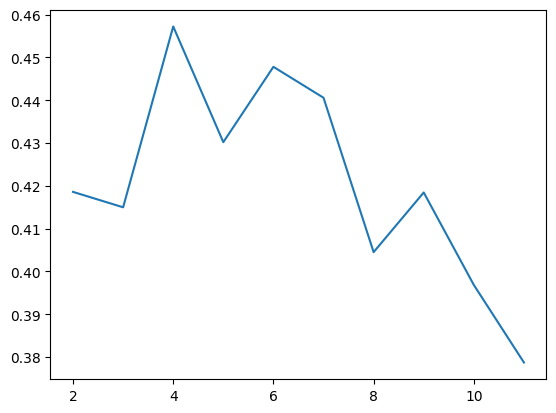

In [63]:
plt.plot(range(2,12),silhouette(x_scaled, max_clusters=11)[1])
print('N de Clusters recomendados por silhouette: ' + str(silhouette(x_scaled, max_clusters=11)[0]))

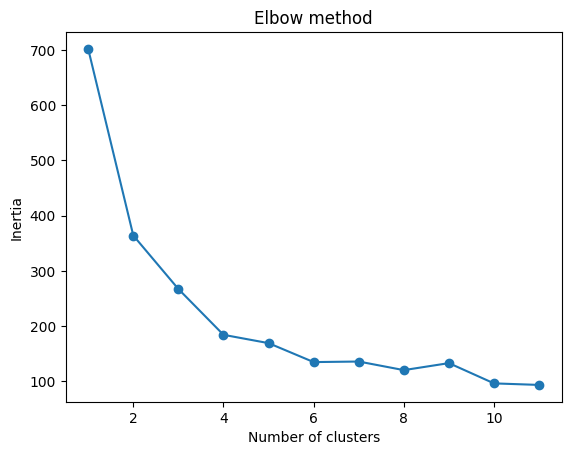

In [64]:
# Metodo Elbow
inertias = []
for i in range(1,12):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(x_scaled)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,12), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()